<a href="https://colab.research.google.com/github/FatmaChahbar/DeepLearning.AI-Tensorflow-Developer_Assignments/blob/main/Copy_of_C4_W4_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [ ]:
#!pip install tensorflow==2.5.0

In [1]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [3]:
!wget --no-check-certificate \
    https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv \
    -O /tmp/daily-min-temperatures.csv

--2023-02-18 17:33:28--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67921 (66K) [text/plain]
Saving to: ‘/tmp/daily-min-temperatures.csv’

/tmp/daily-min-temp 100%[===================>]  66.33K  --.-KB/s    in 0.004s  

2023-02-18 17:33:28 (18.4 MB/s) - ‘/tmp/daily-min-temperatures.csv’ saved [67921/67921]



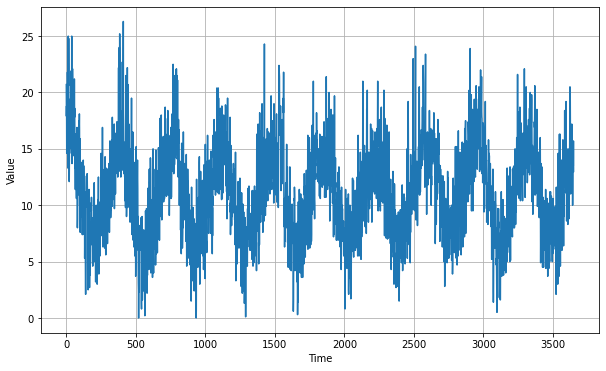

In [4]:
import csv
time_step = []
temps = []

with open('/tmp/daily-min-temperatures.csv') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  step=0
  for row in reader:

    temps.append(float(row[1]))
    time_step.append(step)
    step+=1
# YOUR CODE HERE. READ TEMPERATURES INTO TEMPS
# HAVE TIME STEPS BE A SIMPLE ARRAY OF 1, 2, 3, 4 etc

series = np.array(temps)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [5]:
split_time = 2500
time_train =time[:split_time] # YOUR CODE HERE
x_train =series[:split_time] # YOUR CODE HERE
time_valid =time[split_time:] # YOUR CODE HERE
x_valid =series[split_time:] # YOUR CODE HERE

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000


In [6]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
   dataset = tf.data.Dataset.from_tensor_slices(series)
   dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
   dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
   dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
   dataset = dataset.batch(batch_size).prefetch(1)
   return dataset
    # YOUR CODE HERE

In [7]:
def model_forecast(model, series, window_size):
   dataset = tf.data.Dataset.from_tensor_slices(series)
   dataset = dataset.window(window_size, shift=1, drop_remainder=True)
   dataset = dataset.flat_map(lambda w: w.batch(window_size))
   dataset = dataset.batch(32).prefetch(1)
   forecast = model.predict(dataset)
   return forecast


    # YOUR CODE HERE

In [8]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
                                     tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
# YOUR CODE HERE
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


<PrefetchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
(2500,)
Epoch 1/100
10/10 [==============================] - 13s 62ms/step - loss: 11.8401 - mae: 12.3329 - lr: 1.0000e-08
Epoch 2/100
10/10 [==============================] - 1s 35ms/step - loss: 11.3343 - mae: 11.8266 - lr: 1.1220e-08
Epoch 3/100
10/10 [==============================] - 1s 34ms/step - loss: 10.5977 - mae: 11.0891 - lr: 1.2589e-08
Epoch 4/100
10/10 [==============================] - 1s 35ms/step - loss: 9.7742 - mae: 10.2647 - lr: 1.4125e-08
Epoch 5/100
10/10 [==============================] - 1s 38ms/step - loss: 8.9272 - mae: 9.4166 - lr: 1.5849e-08
Epoch 6/100
10/10 [==============================] - 1s 33ms/step - loss: 8.1024 - mae: 8.5906 - lr: 1.7783e-08
Epoch 7/100
10/10 [==============================] - 1s 34ms/step - loss: 7.3248 - mae: 7.8118 - lr: 1.9953e-08
Epoch 8/100
10/10 [==============================] 

(1e-08, 0.0001, 0.0, 60.0)

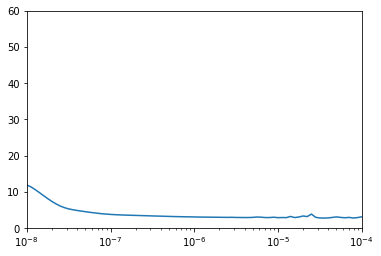

In [9]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

In [11]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model = tf.keras.models.Sequential([
    # YOUR CODE HERE
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)# YOUR CODE HERE, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=150)# YOUR CODE HERE)

# EXPECTED OUTPUT SHOULD SEE AN MAE OF <2 WITHIN ABOUT 30 EPOCHS

Epoch 1/150
25/25 [==============================] - 4s 20ms/step - loss: 6.7173 - mae: 7.2010
Epoch 2/150
25/25 [==============================] - 1s 20ms/step - loss: 3.1303 - mae: 3.6009
Epoch 3/150
25/25 [==============================] - 1s 18ms/step - loss: 3.1160 - mae: 3.5871
Epoch 4/150
25/25 [==============================] - 1s 19ms/step - loss: 3.1229 - mae: 3.5935
Epoch 5/150
25/25 [==============================] - 1s 21ms/step - loss: 3.1638 - mae: 3.6334
Epoch 6/150
25/25 [==============================] - 1s 19ms/step - loss: 3.1462 - mae: 3.6158
Epoch 7/150
25/25 [==============================] - 1s 31ms/step - loss: 3.0120 - mae: 3.4811
Epoch 8/150
25/25 [==============================] - 1s 34ms/step - loss: 2.9924 - mae: 3.4615
Epoch 9/150
25/25 [==============================] - 1s 19ms/step - loss: 3.6277 - mae: 4.1021
Epoch 10/150
25/25 [==============================] - 1s 21ms/step - loss: 2.9283 - mae: 3.3980
Epoch 11/150
25/25 [=============================

In [12]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

113/113 [==============================] - 2s 10ms/step


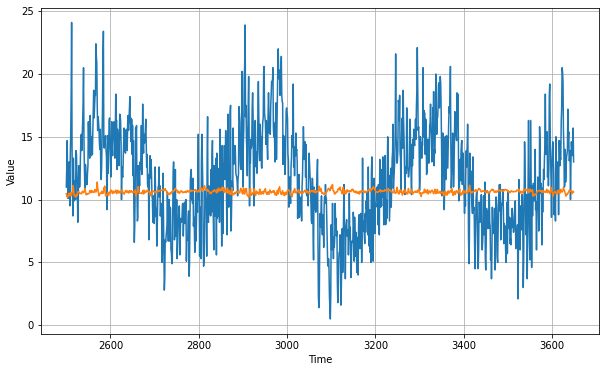

In [13]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

# EXPECTED OUTPUT. PLOT SHOULD SHOW PROJECTIONS FOLLOWING ORIGINAL DATA CLOSELY

In [14]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

# EXPECTED OUTPUT MAE < 2 -- I GOT 1.789626

3.372876

In [15]:
print(rnn_forecast)
# EXPECTED OUTPUT -- ARRAY OF VALUES IN THE LOW TEENS

[10.472686 10.257118 10.235372 ... 10.653496 10.656816 10.611163]
